<a href="https://colab.research.google.com/github/drtrt-org/drtrt-blog-resources/blob/main/prettier_and_csharpier/nuget_downloads_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create CSharpier downloads chart

## Grab the data from NuGet

Let's do this in a dedicated step and then save the result, so we don't spam NuGet with requests while we play with the graph plotting.

In [7]:
# Clone repo

!git clone https://github.com/drtrt-org/drtrt-blog-resources.git

fatal: destination path 'drtrt-blog-resources' already exists and is not an empty directory.


In [5]:
import requests
import pandas as pd


package_name = 'CSharpier'
months = 60

local_file_path = f'/content/npm_download_{package_name}_{months}_months_data.csv'

all_data = pd.DataFrame()



url = f"https://nugettrends.com/api/package/history/{package_name}?months={months}"
print(f"Downloading data from: {url}")

# Make the request
response = requests.get(url)
if response.status_code == 200:
    # Load data into a DataFrame
    data = response.json()['downloads']
    all_data = pd.DataFrame(data)
    all_data['week'] = pd.to_datetime(all_data['week'])  # Convert to datetime

    # Rename the 'count' column to 'downloads', which is what the plotting step
    # expects.
    all_data = all_data.rename(columns={"count": "downloads"})

    all_data.to_csv(local_file_path, index=False)

    print(f"Data saved to '{local_file_path}'")

Data saved to '/content/npm_download_CSharpier_60_months_data.csv'


In [3]:
# Display contents of normalize_then_plot.ipynb
!jupyter nbconvert --to html '/content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb' --output '/content/temp.html'
from IPython.display import display, HTML

with open("/content/temp.html", "r") as f:
    display(HTML(f.read()))


[NbConvertApp] Converting notebook /content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb to html
[NbConvertApp] Writing 275997 bytes to /content/temp.html


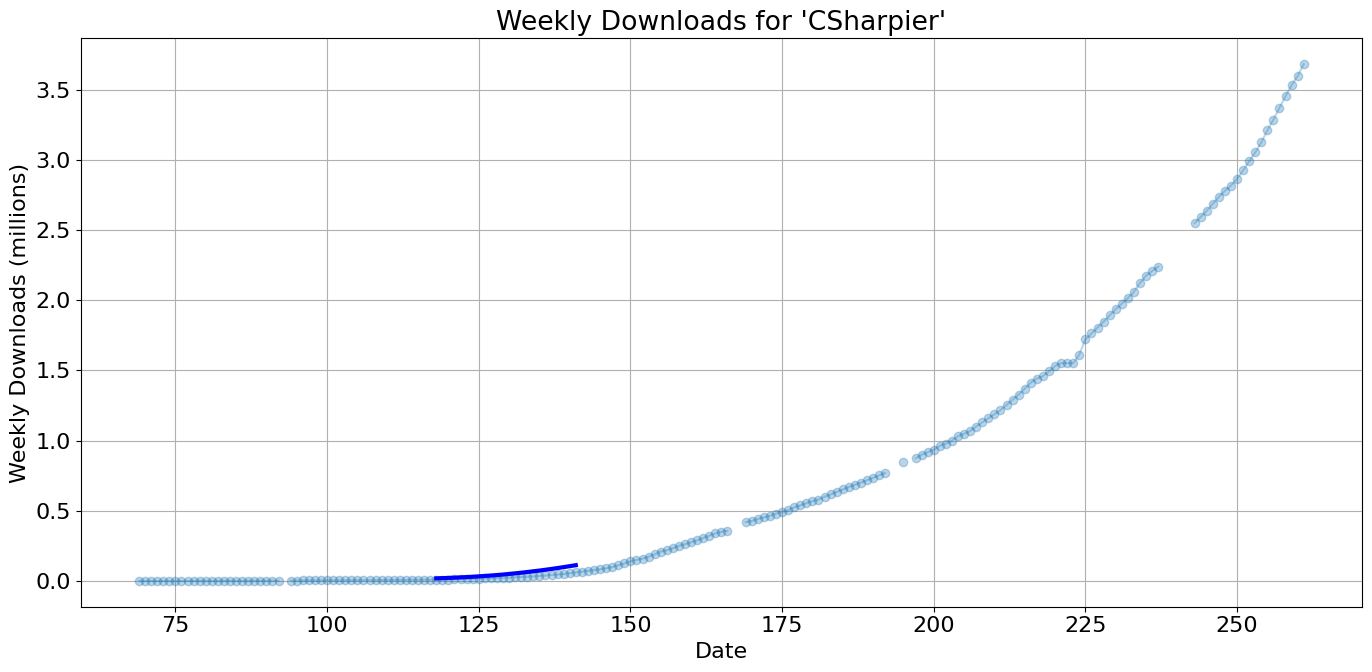

In [6]:
%run '/content/drtrt-blog-resources/prettier_and_csharpier/normalize_then_plot.ipynb'